# Final Review

In [43]:
using Random
using Plots
using StatsBase
using GraphRecipes
using LightGraphs

## Dynamic Graphs

In [217]:
function sample_alpha_model(n0, m, N, α=1)
    nodes = collect(1:N)
    G = random_regular_graph(n0, m)
    initial_edges = edges(G)
    G = SimpleGraph(N)
    for edge in initial_edges
        n1, n2 = src(edge), dst(edge)
        add_edge!(G, n1, n2)
    end

    for t=1:N - n0
        n_new = t + n0
        probs = ProbabilityWeights(α * degree(G) + [n < t + n0 ? 1 : 0 for n=1:N])
        for n_connect in sample(nodes, probs, m, replace=false)
            add_edge!(G, n_new, n_connect)
        end
        n_edges = length(edges(G))
    end
    return G
end

sample_alpha_model (generic function with 2 methods)

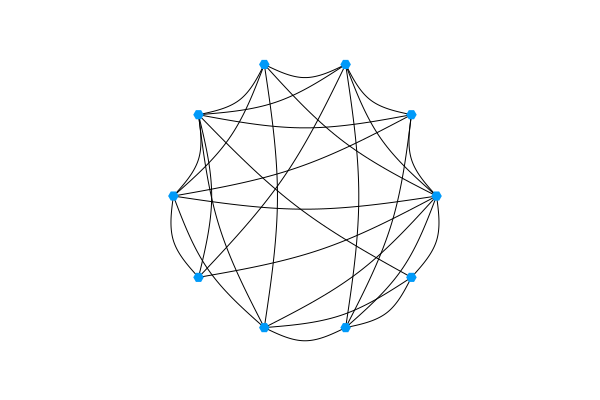

In [237]:
G = sample_alpha_model(n0, m, N)
graphplot(G, method=:circular, nodestrokealpha=0)

In [242]:
degree(G)

10-element Array{Int64,1}:
 8
 7
 4
 8
 4
 7
 6
 4
 4
 4

In [245]:
m + N - n0

8

In [216]:
mean(degree(G))

5.6

In [214]:
m * (N - n0 / 2)

28.0

In [211]:
G

{10, 28} undirected simple Int64 graph

Number of edges at time $t$ is given by

$$
    l_t = m\left(\frac{n_0}{2} + t\right)
$$

In [212]:
hcat(0:T, collect(m * (n0 ÷ 2 .+ (0:T))))

5×2 Array{Int64,2}:
 0  12
 1  16
 2  20
 3  24
 4  28

In [133]:
t=1
probs = ProbabilityWeights(α * degree(G) + [n < t + n0 ? 1 : 0 for n=1:N])
sample(nodes, probs, m, replace=false)

3-element Array{Int64,1}:
 2
 6
 4

In [240]:
n0, m, N = 6, 4, 10
T = N - n0
α = 1.0

Random.seed!(314)

nodes = collect(1:N)
G = random_regular_graph(n0, m)
initial_edges = edges(G)
G = SimpleGraph(N)
for edge in initial_edges
    n1, n2 = src(edge), dst(edge)
    add_edge!(G, n1, n2)
end

for t=1:N - n0
    n_new = t + n0
    probs = ProbabilityWeights(α * degree(G) + [n < t + n0 ? 1 : 0 for n=1:N])
    for n_connect in sample(nodes, probs, m, replace=false)
        add_edge!(G, n_new, n_connect)
    end
end

